## Linear Models

- Today we will train linearmodels with Scikit-Learn.
- By training models following by the standard ML procedure, we will see how ML differs from standard econometric models.

In [16]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import warnings

%matplotlib inline
warnings.filterwarnings(action="ignore")

np.random.seed(42) # to make this notebook's output stable across runs
plt.style.use('seaborn')

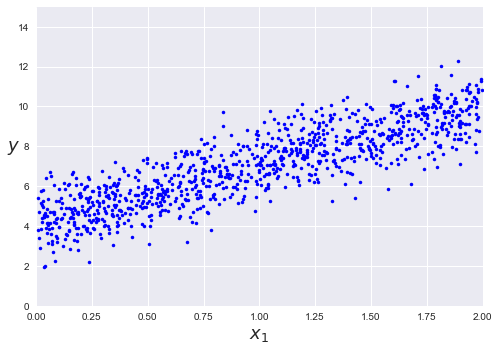

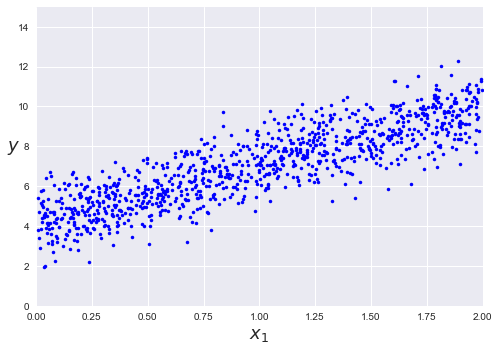

In [17]:
# generating pseudo data

X = 2 * np.random.rand(1000, 1).astype(float)
y = 4 + 3 * X + np.random.randn(1000, 1).astype(float)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Our familiar formula (from normal equation):

$\hat{\beta}= (X'X)^{-1}X'y$

In [18]:
X_b = np.c_[np.ones((1000, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

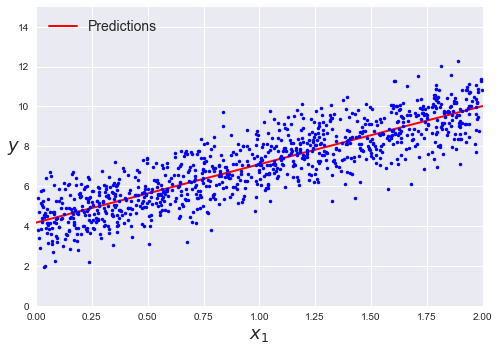

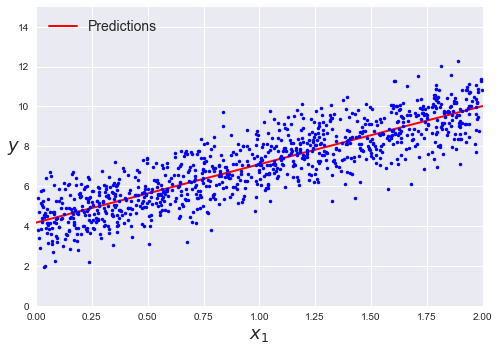

In [19]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
# you can do the same thing with sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

reg = LinearRegression()
reg.fit(X, y)
print(reg.intercept_, reg.coef_)
print(theta_best)

[4.17478026] [[2.92260742]]
[[4.17478026]
 [2.92260742]]
[4.17478026] [[2.92260742]]
[[4.17478026]
 [2.92260742]]


- While most ML algorithms are trained via gradient descent algorithms, the LinearRegression class of scikit-learn is not.
- It is actually based on scipy (or, scipy.linalg,lstsq() to be precise).

## Gradient Descent

- 경사하강법
- 경수통에 나오는 것처럼 임의의 initial value를 넣고 1차미분 값으로 방향(오른쪽 왼쪽)을 정하고 2차미분 값으로 얼마나 움직일 지 정해서 노가다로 값들을 넣어서 최소의 MSE를 가지는 값을 찾는 방법임 
- Gradient descent is the backbone of an machine learning algorithm. 
- from the point of random initialization, move toward the true parameter(s) with minimizing the loss function (e.g., MSE) in each step
- the size of each step matters $\rightarrow$ learning rate (배우는 속도, 빠르게 찾는 속도)
  - low learning rate $\rightarrow$ takes too long
  - high learning rate $\rightarrow$ may pass the global minimum and arrive at local minimum
- In case of linear regression, MSE is a convex function $\rightarrow$ unique global minimum
- When using GD, it is **necessary to scale features.** (e.g., StandardScaler in sklearn)

- partial derivative of loss function: 수식은 이해못해도 됨...

$\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta' x^{(i)} - y^{(i)})x^{(i)}_{j}$

- or use the gradient vector:

$\bigtriangledown_{\theta} MSE(\theta) = \frac{2}{m}X'(X\theta-y)$

- then, we can use

$\theta^{(i+1)}=\theta^{(i)} - \eta \bigtriangledown_{\theta} $

<img src="./100.png" width="600" height="600">

In [21]:
eta = 0.01
n_iterations = 1000
m = 1000
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.10334102],
       [2.98387348]])

array([[4.10334102],
       [2.98387348]])

In [22]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

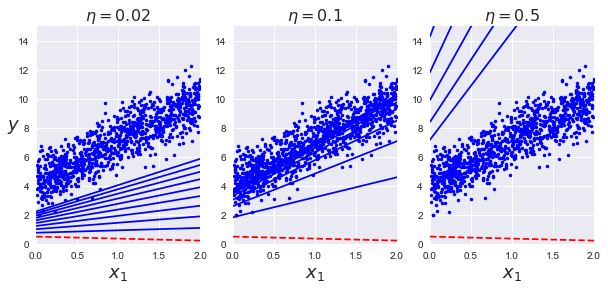

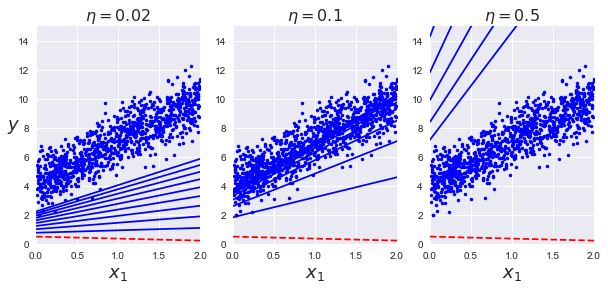

In [23]:
# importance of the size of each step

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

- (위 그림을 보면 learning rate가 0.02일때는 직선이 data들로 천천히 가는 모습
0.1일때는 적절한 속도로 data에 근접한느 모습 0.5일때는 너무 빨라서 지나쳐버린 모습을 보여줌)
- too low learning rate (left figure) vs. too high learning rate (right figure)
- how can we find the adequate learning rate?
  - use grid search ????????????????????????????????????????????????????????????????????
  - and one needs to limit the number of iteration in order not to waste time $\rightarrow$ set the tolerance limit
- Additional gradient descent algorithms
    - Stochastic gradient descent(SGD)
    - Mini-Batch gradident descent(BGD)

## Polynomial regression

- What if data takes a complicated form? Nonlinear?
- A simple way to address is to add polynomials.

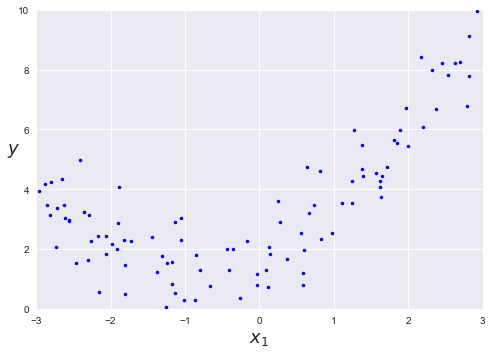

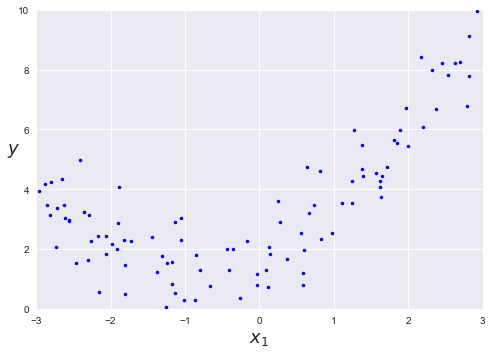

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- use PolynomialFeatures in sklearn
- When there are two features a and b, applying PolynomialFeatures with degree = 3 gives not only $a^2 , a^3 , b^2, b^3$ but also $ab, a^2 b, ab^2$. -> 변수개수가 폭발적으로 증가하게 됨
- You can use 'interaction_only = False'  not to have interaction terms.
- apply the method of 'get_feature_names()' to the object of PolynomialFeatures to get the list.

In [25]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [26]:
reg = LinearRegression()
res = reg.fit(X_poly, y)
print(res.intercept_, res.coef_)

[1.81272494] [[0.9457151  0.55985611]]
[1.81272494] [[0.9457151  0.55985611]]


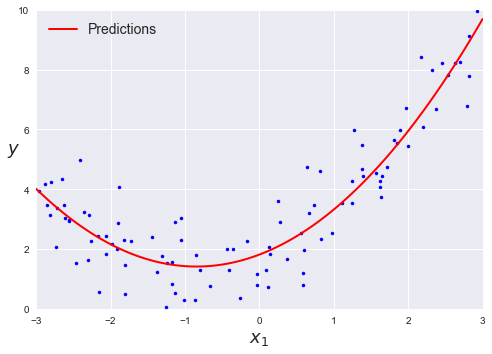

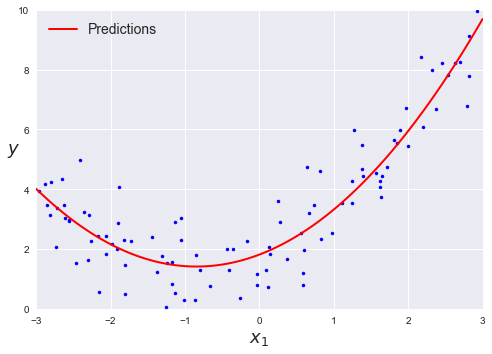

In [27]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- Polynomial models have a better fit to the training set. 
- The figure below shows the case of degree = 300 $\rightarrow$ overfitting
    - Hyperparameter(=degree결정 = x^2까지 넣을 건지 x^3까지 넣을 건지 등등..)의 결정이 중요하다
    - 뒷 단원에서 배우겠지만 이걸 결정하는 방법은 하나씩 넣어서 뭐가 제일 나은지 판단함
    - degree가 너무 높으면 overfitting 낮으면 underfitting한다(바로 아래 코드 체크)
- how to check overfitting or underfitting?
  1. cross validation: good in traing & bad in test (overfitting), bad both in traing and test (underfitting)
  2. learning curve: how the performance in training and test set changes depending on the size of training set

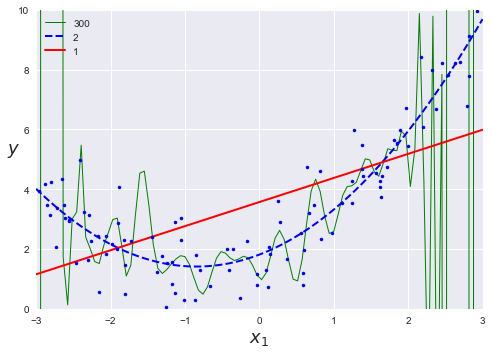

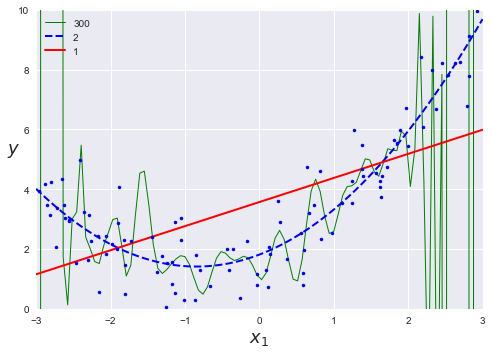

In [28]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

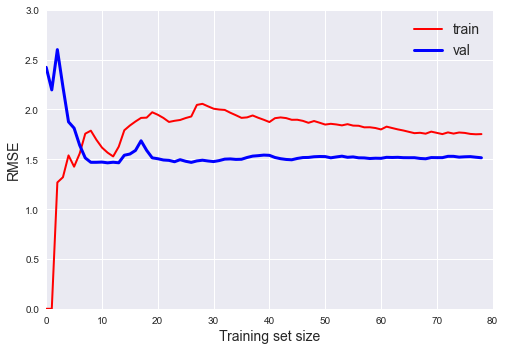

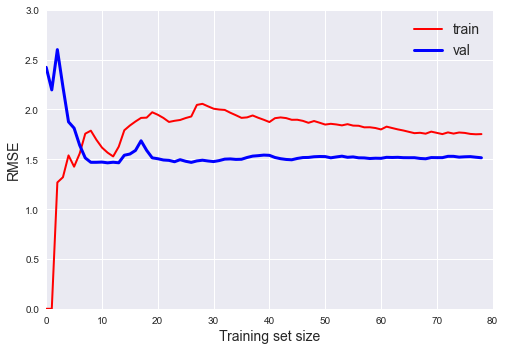

In [29]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
    
    lin_reg = LinearRegression()
    
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                           
plt.show()      

- The figure above shows the learning curve of simple linear regression. 
    - x축은 data size, y축은 error이다
    - data set이 많을 수록 training에 좋다
- It is a typical example of underfitting.
- The figure below shows the learning curve of polynomial regression (degree = 10)

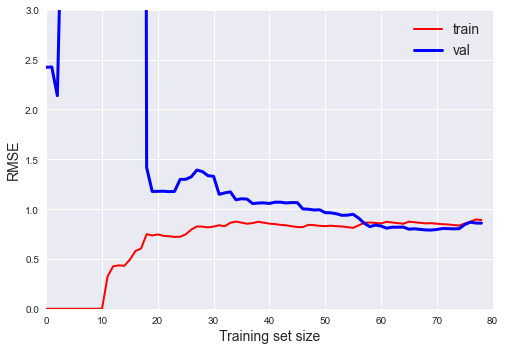

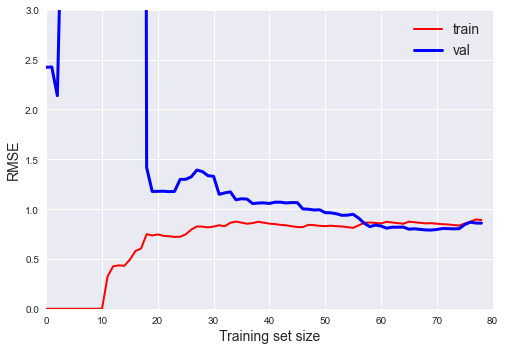

In [30]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])       
plt.show()                       

위의 표를 보면 degree가 10인 모형이다
- 초반에 train set의 error가 0 인반면 validation error가 높아진다
    - 이는 초반에 너무 in sample data를 over-fitting하여 out sample data를 못맞는 경우를 의미